In [1]:
#1.数据导入
#1.1导入数据
import pandas as pd
#1.2.利用pandas的read.csv模块从互联网中收集泰坦尼克号数据集
titanic=pd.read_csv("data/泰坦尼克号数据集.csv")
titanic.info() #查看信息
#2人工选择特征pclass,age,sex
X=titanic[['Pclass','Age','Sex']]
y=titanic['Survived']

#3.特征工程
#数据的填补
X['Age'].fillna(X['Age'].mean(),inplace=True)
X = pd.get_dummies(X)
#数据的切分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=22)


#4.使用单一的决策树进行模型的训练及预测分析
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_y_pred=dtc.predict(X_test)
dtc.score(X_test,y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/root/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0.7802690582959642

In [2]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=6,random_state=9)
rfc.fit(X_train,y_train)
rfc_y_pred=rfc.predict(X_test)
rfc.score(X_test,y_test)

0.7623318385650224

In [3]:
from sklearn.metrics import classification_report
print(classification_report(dtc_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       146
           1       0.66      0.77      0.71        77

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223



In [4]:
print(classification_report(rfc_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       140
           1       0.67      0.72      0.69        83

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.76      0.76       223



In [5]:
rf = RandomForestClassifier()
param ={"n_estimators":[20,30,40,50,60,80], "max_depth": [2,4,6,8,10,12]}
from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(rf,param_grid=param,cv=3)
estimator.fit(X_train,y_train)
estimator.score(X_test,y_test)

0.757847533632287

## Adaboost 葡萄酒数据案例

In [6]:
import pandas as pd
df_wine = pd.read_csv('data/wine.data')
# 修改列名
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# 去掉一类(1,2,3)
df_wine = df_wine[df_wine['Class label'] != 1]
# 获取特征值和目标值
X = df_wine[['Alcohol', 'Hue']].values
y = df_wine['Class label'].values

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state=0)

In [10]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
accuracy_score(y_train_pred,y_train)

0.8450704225352113

In [11]:
accuracy_score(y_test_pred,y_test)

0.8541666666666666

In [12]:
ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
accuracy_score(y_train_pred,y_train)

1.0

In [13]:
accuracy_score(y_test_pred,y_test)

0.875

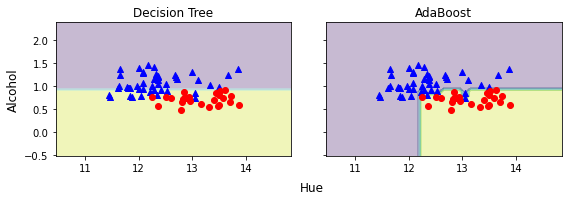

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x_min,x_max = X_train[:,0].min() - 1,X_train[:,0].max() + 1
y_min,y_max = X_train[:,1].min() - 1,X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr = plt.subplots(1,2,sharex='col',sharey='row',figsize=(8,3))

for idx,clf,tt in zip([0,1],[tree,ada],['Decision Tree', 'AdaBoost']):
    clf.fit(X_train,y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx,yy,Z,alpha = 0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2,-1.2,s='Hue',ha='center',va='center',fontsize = 12)
plt.tight_layout()

## 车辆贷款违约预测

In [15]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from collections import Counter

In [27]:
# 1. 加载数据集
data = pd.read_csv('data/车辆贷款违约预测.csv')

In [28]:
# 基本数据处理
data = data.drop(['customer_id','disbursed_date'],axis = 1)

In [30]:
data.describe()

,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,...,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,Credit_level,employment_type,age,loan_default
count,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,1.500000e+05,...,150000.00,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.447133,1.045500,0.153427,1.670825e+05,2.225586e+05,2.221730e+05,0.060133,0.027967,0.007293,5.416077e+03,...,inf,5.169842e+04,2.773138e+03,6.506428e+02,1.438740,1984.867900,3.132360,0.487507,34.132100,0.176967
std,5.197172,1.952708,0.542496,9.808619e+05,2.840313e+06,2.844075e+06,0.652912,0.325185,0.111236,1.617336e+05,...,NaN,2.614563e+06,1.043622e+05,1.312314e+05,0.789844,9.813379,5.268384,0.561527,9.813379,0.381642
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,...,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1950.000000,-1.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1978.000000,-1.000000,0.000000,26.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1987.000000,-1.000000,0.000000,32.000000,0.000000
75%,3.000000,1.000000,0.000000,3.545900e+04,6.360000e+04,6.150850e+04,0.000000,0.000000,0.000000,0.000000e+00,...,1.26,2.500000e+01,0.000000e+00,1.000000e+00,1.670000,1993.000000,8.000000,1.000000,41.000000,0.000000
max,354.000000,144.000000,23.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,7.000000,3.603285e+07,...,inf,1.000000e+09,1.980000e+07,5.000000e+07,18.000000,2001.000000,13.000000,2.000000,69.000000,1.000000


In [31]:
inf_names = []
for name in data.columns:
    if np.any(np.isinf(data[name])):
        inf_names.append(name)

In [32]:
for name in inf_names:
    inf_ids = data[data[name]==np.inf].index
    data = data.drop(inf_ids) # 这里删除包含Inf数据的行

In [34]:
# 获取特征和目标
x = data.iloc[:,:-1].astype(np.float64)
y = data.iloc[:,-1]

In [35]:
# 训练集测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=22)

In [57]:
estimator = RandomForestClassifier(n_estimators=100,oob_score=True,random_state=22)
estimator.fit(x_train,y_train)
# joblib.dump(estimator,'model/model/random_forest.pth')

RandomForestClassifier(oob_score=True, random_state=22)

In [58]:
from sklearn.metrics import classification_report
y_pred= estimator.predict(x_test)

In [59]:
estimator.score(x_test,y_test)

0.8208880592039469

In [63]:
estimator.oob_score_

0.8201100091674306

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     24689
           1       0.38      0.02      0.04      5309

    accuracy                           0.82     29998
   macro avg       0.60      0.51      0.47     29998
weighted avg       0.75      0.82      0.75     29998



## 红酒分类

In [64]:
import joblib
import numpy as np
import xgboost as xgb
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [68]:
data = pd.read_csv('data/红酒品质分类.csv')

In [69]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [71]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1] - 3 # 从3开始的类别， 处理成从0开始

# 2. 数据集分割
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=22)

# 3. 存储数据
pd.concat([x_train, y_train], axis=1).to_csv('data/红酒品质分类-train.csv')
pd.concat([x_valid, y_valid], axis=1).to_csv('data/红酒品质分类-valid.csv')

## 训练xgboost模型

In [72]:
train_data = pd.read_csv('data/红酒品质分类-train.csv')
valid_data = pd.read_csv('data/红酒品质分类-valid.csv')

# 训练集
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# 测试集
x_valid = valid_data.iloc[:, :-1]
y_valid = valid_data.iloc[:, -1]
estimator = xgb.XGBClassifier(n_estimators = 100,objective='multi:softmax',
                              eval_metric='merror',eta=0.1,use_label_encoder=False,random_state = 22)
estimator.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='merror', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [74]:
y_pred = estimator.predict(x_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.71      0.84      0.77       136
           3       0.63      0.61      0.62       128
           4       0.67      0.50      0.57        40
           5       0.33      0.33      0.33         3

    accuracy                           0.67       320
   macro avg       0.39      0.38      0.38       320
weighted avg       0.64      0.67      0.65       320



/root/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
estimator.fit(x_train,y_train,sample_weight=class_weights)
y_pred = estimator.predict(x_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.18      0.22        11
           2       0.72      0.84      0.77       136
           3       0.69      0.58      0.63       128
           4       0.55      0.57      0.56        40
           5       0.20      0.33      0.25         3

    accuracy                           0.67       320
   macro avg       0.41      0.42      0.41       320
weighted avg       0.66      0.67      0.66       320



/root/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
spliter = StratifiedKFold(n_splits=5,shuffle=True)
param_grid = {'max_depth': np.arange(3, 5, 1),
              'n_estimators': np.arange(50, 150, 50),
              'eta': np.arange(0.1, 1, 0.3)}
estimator = xgb.XGBClassifier(n_estimators = 100,objective='multi:softmax',
                              eval_metric='merror',eta=0.1,use_label_encoder=False,random_state = 22)
cv = GridSearchCV(estimator,param_grid=param_grid,cv=spliter)
cv.fit(x_train,y_train,sample_weight=class_weights)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                   

In [81]:
cv.best_params_

{'eta': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 100}

In [82]:
y_pred = cv.predict(x_valid)

In [87]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.09      0.14        11
           2       0.71      0.82      0.76       136
           3       0.66      0.63      0.65       128
           4       0.66      0.57      0.61        40
           5       0.25      0.33      0.29         3

    accuracy                           0.68       320
   macro avg       0.44      0.41      0.41       320
weighted avg       0.66      0.68      0.67       320

